# IPL Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

In [2]:
matches = pd.read_csv('IPL Analysis/IPL Matches 2008-2020.csv')
ball_by_ball = pd.read_csv('IPL Analysis/IPL Ball-by-Ball 2008-2020.csv')

In [3]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
# Let replace these teams name by there short name
team_name = ['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals']
short_name = ['RCB','KXI','DC','MI','KKR','RR','SRH','CSK','KTK','PW','SRH','GL','RPS','RPS','DC']
ball_by_ball = ball_by_ball.replace(team_name,short_name)
matches = matches.replace(team_name,short_name)

Most of the time teams have preferred to field because most of the matches occurs during night where all teams like to take advantage of dew

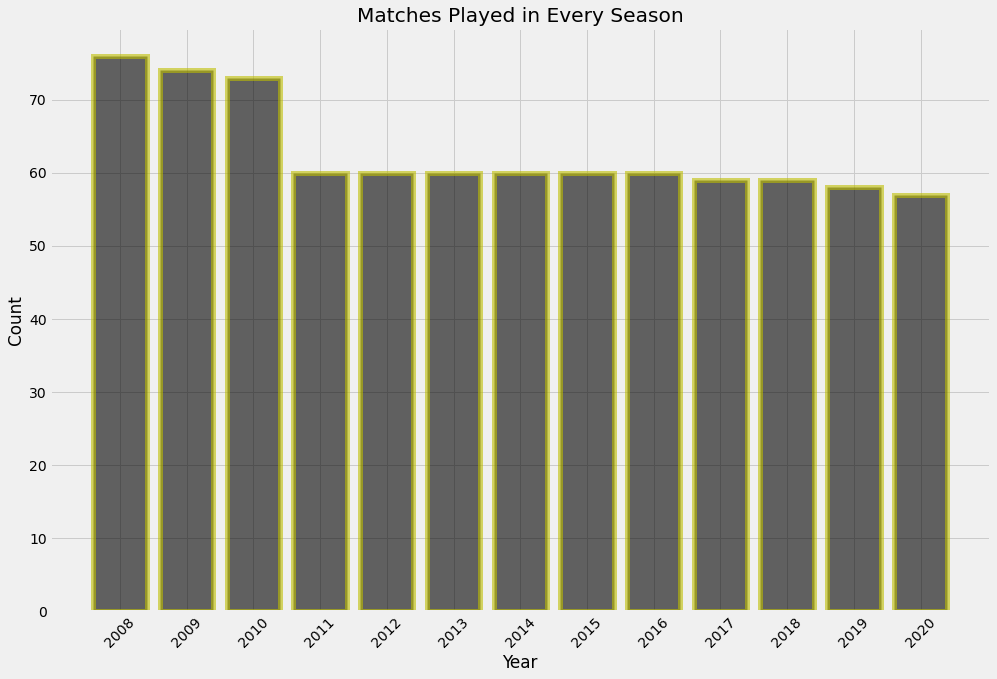

In [5]:
matches['season'] = matches['date'].apply(lambda x:x.split('/')[2])
y = list(matches['season'].value_counts())
plt.figure(figsize=(15,10))
plt.bar(matches['season'].unique(),matches['season'].value_counts(),color='black',alpha=0.6,edgecolor='y',linewidth=5)
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Matches Played in Every Season')
plt.show()

Let's build a Dataframe with each team stats

In [6]:
team_stats = pd.DataFrame([matches['team1'].value_counts(),matches['team2'].value_counts(),matches['winner'].value_counts(),matches['toss_winner'].value_counts()])
team_stats = team_stats.T
team_stats['total_matches'] = team_stats['team1'] + team_stats['team2']
team_stats = team_stats.sort_values(by=['winner','total_matches'],ascending=False)
team_stats['win_percentage (%)'] = round((team_stats['winner']/team_stats['total_matches'])*100,2)
team_stats['toss_win_percentage (%)'] = round((team_stats['toss_winner']/team_stats['total_matches'])*100,2)
team_stats = team_stats.drop(['team1','team2'],1).reset_index()

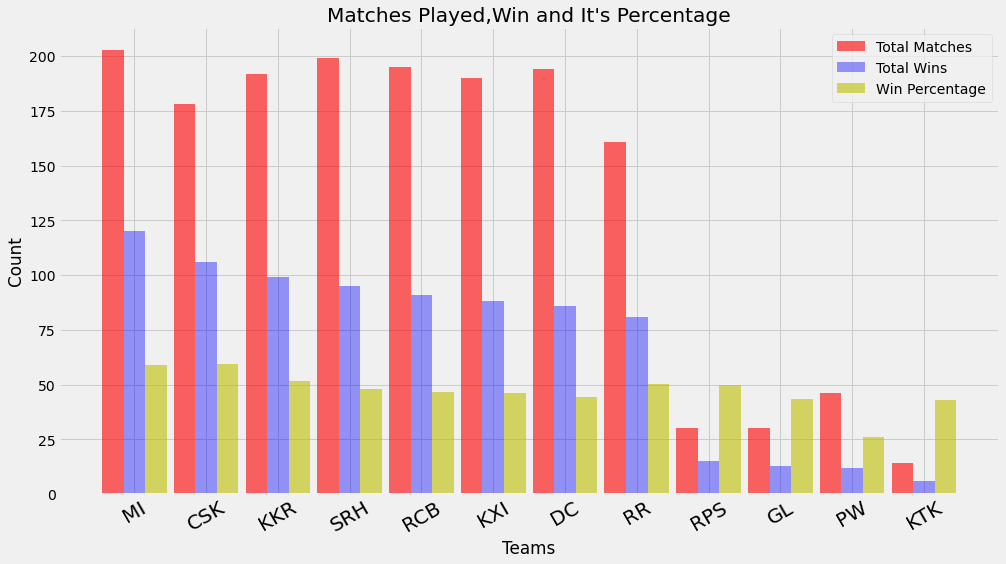

In [7]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)

ax.bar(team_stats.index - .3,team_stats['total_matches'],width=0.3,color='r',align='center',alpha=0.6,label='Total Matches')
ax.bar(team_stats.index ,team_stats['winner'],width=0.3,color='b',align='center',alpha=0.4,label='Total Wins')
ax.bar(team_stats.index + .3,team_stats['win_percentage (%)'],width=0.3,color='y',align='center',alpha=0.6,label='Win Percentage')
plt.xticks(ticks=[i for i in range(12)],labels=list(team_stats['index']),rotation=30,fontsize=20)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title("Matches Played,Win and It's Percentage")
plt.legend()
plt.show()

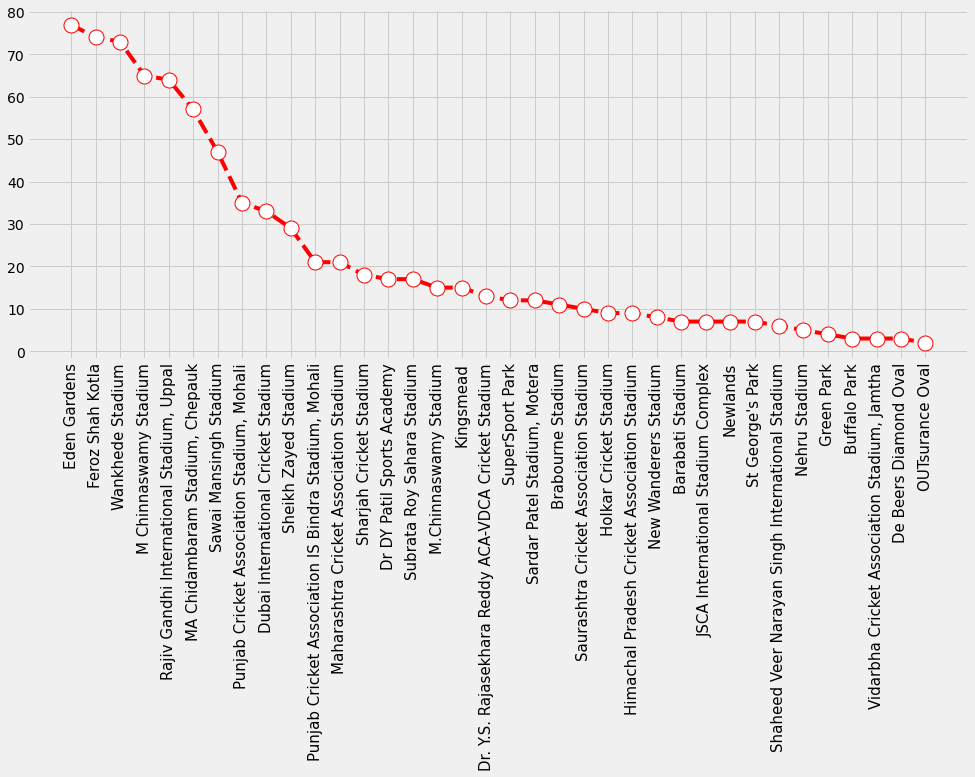

In [8]:
venue = pd.DataFrame(matches['venue'].value_counts()).reset_index()
plt.figure(figsize=(15,6))
plt.plot(venue.index,venue['venue'],'ro--',markersize=15,markerfacecolor='w')
plt.xticks(ticks=[i for i in range(len(venue))],labels=list(venue['index']),rotation=90,fontsize=15)
plt.show()

In [9]:
matches['toss_looser'] = ''
matches['batting_first'] = ''
matches['batting_second'] = ''
matches['batting_first_win'] = None
matches['batting_second_win'] = None
for i in range(len(matches)):
    if matches['team1'].loc[i] == matches['toss_winner'].loc[i]:
        # When Team 1 wins the Toss
        matches['toss_looser'].loc[i] = matches['team2'].loc[i]
        if matches['toss_decision'].loc[i] == 'field':
            matches['batting_first'].loc[i] = matches['team2'].loc[i]
            matches['batting_second'].loc[i] = matches['team1'].loc[i]
        else:
            matches['batting_first'].loc[i] = matches['team1'].loc[i]
            matches['batting_second'].loc[i] = matches['team2'].loc[i]
            
    else:
        # When Team 2 wins the Toss
        matches['toss_looser'].loc[i] = matches['team1'].loc[i]
        if matches['toss_decision'].loc[i] == 'field':
            matches['batting_first'].loc[i] = matches['team1'].loc[i]
            matches['batting_second'].loc[i] = matches['team2'].loc[i]
        else:
            matches['batting_first'].loc[i] = matches['team2'].loc[i]
            matches['batting_second'].loc[i] = matches['team1'].loc[i]
            
    if matches['winner'].loc[i] == matches['batting_first'].loc[i]:
        matches['batting_first_win'].loc[i] = matches['batting_first'].loc[i]
        #matches['batting_second_win'].loc[i] = 'batting_first_won'
    else:
        matches['batting_second_win'].loc[i] = matches['batting_second'].loc[i]
        #matches['batting_first_win'].loc[i] = 'batting_second_won'

C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
batting_per = pd.DataFrame([matches['batting_first_win'].value_counts(),matches['batting_second_win'].value_counts()])
#batting_per = batting_per.drop(['batting_first_won','batting_second_won'],1).T
batting_per = batting_per.T.reset_index()
team_stats = pd.merge(team_stats,batting_per,on=['index'])
team_stats.head()

,index,winner,toss_winner,total_matches,win_percentage (%),toss_win_percentage (%),batting_first_win,batting_second_win
0,MI,120,106,203,59.11,52.22,63,57
1,CSK,106,97,178,59.55,54.49,52,54
2,KKR,99,98,192,51.56,51.04,40,59
3,SRH,95,100,199,47.74,50.25,52,43
4,RCB,91,87,195,46.67,44.62,39,53


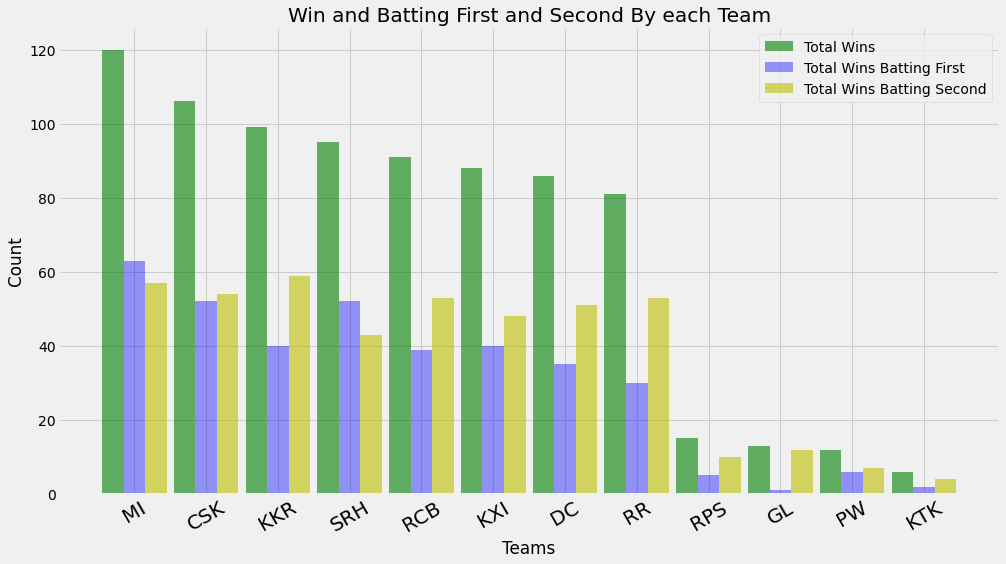

In [11]:
plt.figure(figsize=(15,8))
ax = plt.subplot(111)

ax.bar(team_stats.index - .3,team_stats['winner'],width=0.3,color='g',align='center',alpha=0.6,label='Total Wins')
ax.bar(team_stats.index ,team_stats['batting_first_win'],width=0.3,color='b',align='center',alpha=0.4,label='Total Wins Batting First')
ax.bar(team_stats.index + .3,team_stats['batting_second_win'],width=0.3,color='y',align='center',alpha=0.6,label='Total Wins Batting Second')
plt.xticks(ticks=[i for i in range(12)],labels=list(team_stats['index']),rotation=30,fontsize=20)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title("Win and Batting First and Second By each Team")
plt.legend()
plt.show()

<ipython-input-12-da64b99bb3ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wins = pd.DataFrame(matches.groupby(['season'])['batting_first_win','batting_second_win'].count().reset_index())


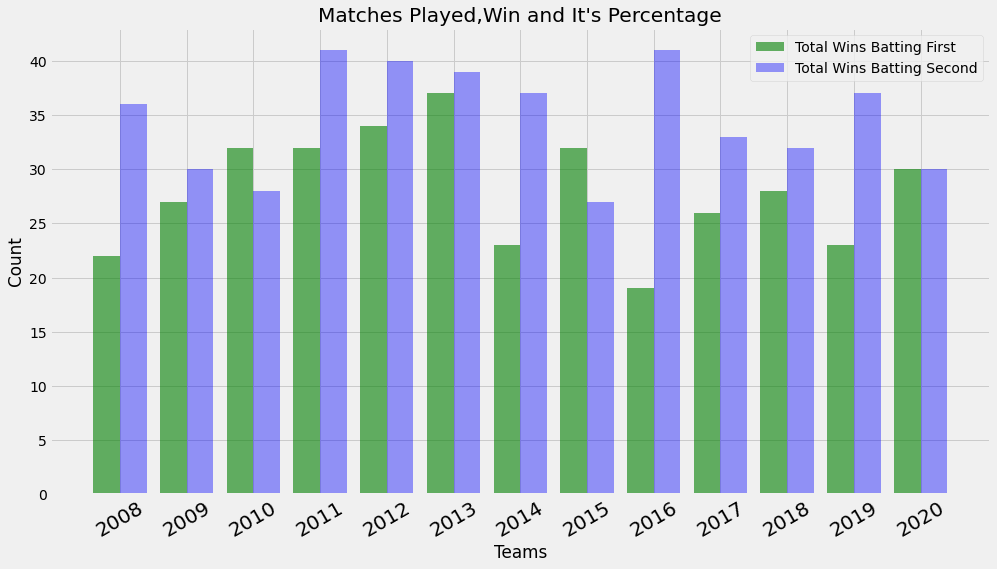

In [12]:
wins = pd.DataFrame(matches.groupby(['season'])['batting_first_win','batting_second_win'].count().reset_index())
#print(wins.columns)
plt.figure(figsize=(15,8))
ax = plt.subplot(111)

ax.bar(wins.index - .2,wins['batting_first_win'],width=0.4,color='g',align='center',alpha=0.6,label='Total Wins Batting First')
ax.bar(wins.index + .2,wins['batting_second_win'],width=0.4,color='b',align='center',alpha=0.4,label='Total Wins Batting Second')
plt.xticks(ticks=[i for i in range(len(wins))],labels=list(wins['season']),rotation=30,fontsize=20)
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title("Matches Played,Win and It's Percentage")
plt.legend()
plt.show()

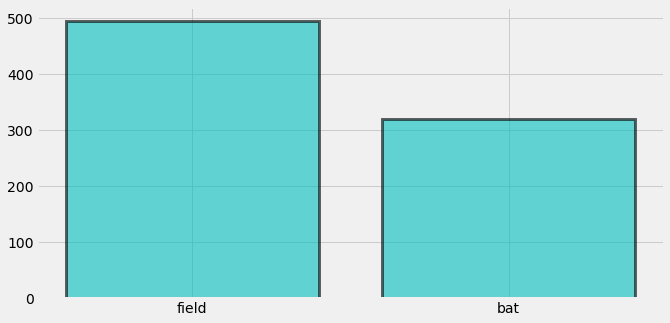

In [13]:
plt.figure(figsize=(10,5))
y = list(matches['toss_decision'].value_counts())
plt.bar(matches['toss_decision'].unique(),matches['toss_decision'].value_counts(),edgecolor='black',linewidth=3,alpha=0.6,color='c')
plt.show()

In [14]:
ball_by_ball  = pd.merge(ball_by_ball,matches)

In [15]:
batsman_score  = ball_by_ball.groupby(['batsman','season','batting_team'])['batsman_runs'].sum().reset_index()
batsman_score = batsman_score.sort_values(by=['season','batsman_runs'],ascending=False)
batsman_score = batsman_score[batsman_score['batsman_runs'] >= 200].reset_index()

In [16]:
def plot_batsman_run(name):
    batsman = batsman_score[batsman_score['batsman'] == name].reset_index()
    plt.figure(figsize=(15,9))
    plt.bar(batsman['season'],batsman['batsman_runs'],alpha = 0.6, color = 'c',linewidth=3,edgecolor='black')
    plt.xlabel('Season')
    plt.ylabel('Runs')
    plt.xticks(rotation=60)
    plt.title('IPL stats of '+ name)
    plt.show()

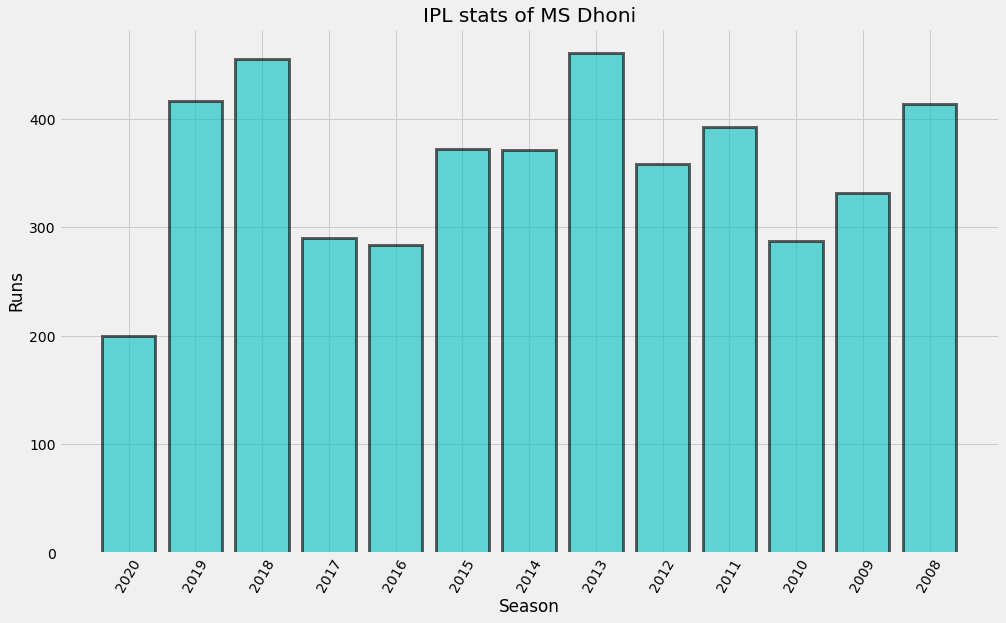

In [17]:
plot_batsman_run('MS Dhoni')

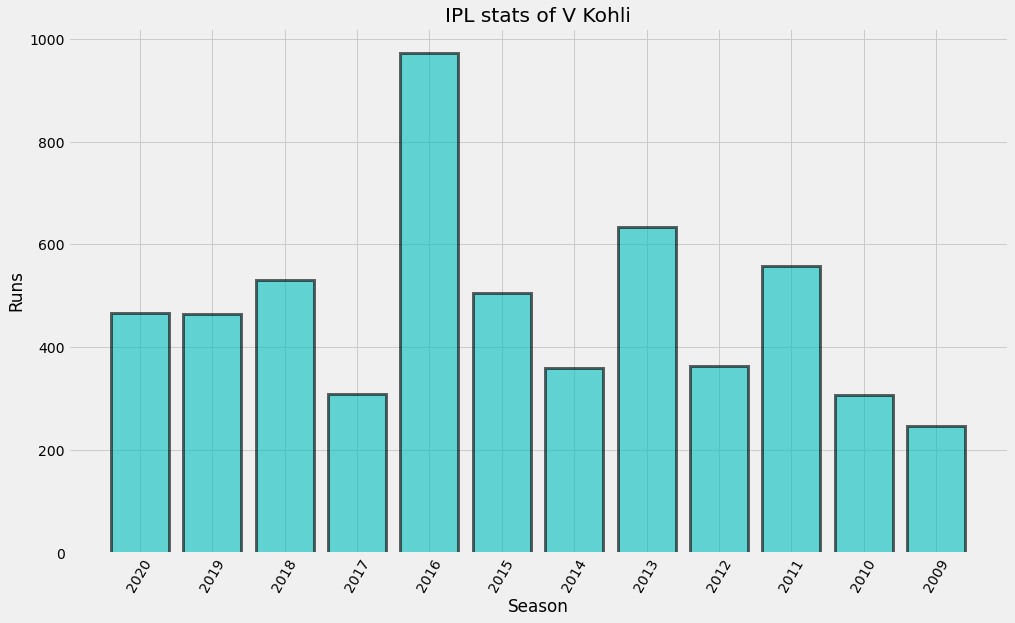

In [18]:
plot_batsman_run('V Kohli')

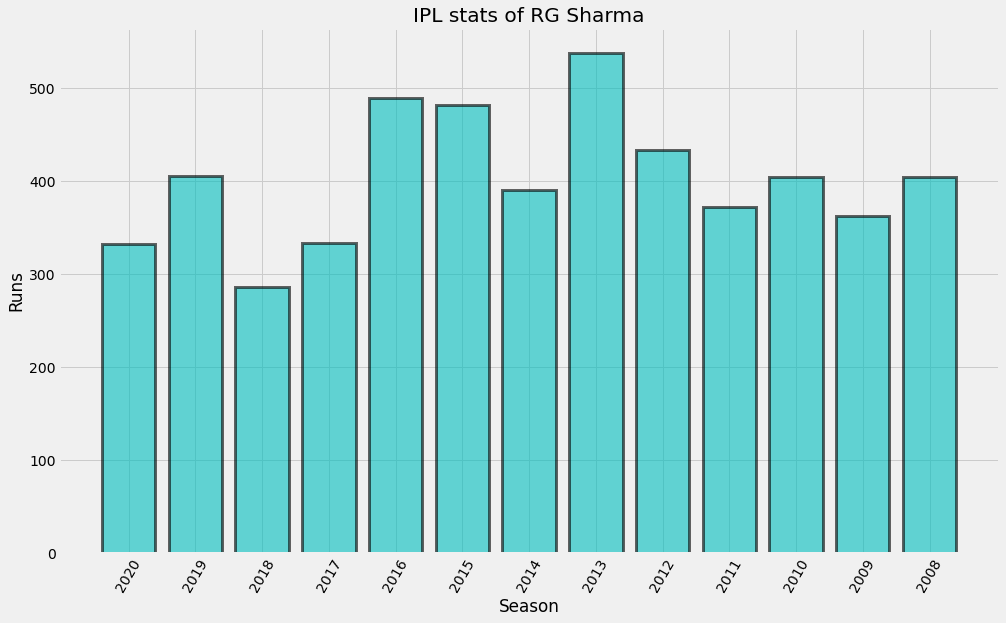

In [19]:
plot_batsman_run('RG Sharma')